In [1]:
import os
import gc
import numpy as np

from scipy.optimize import curve_fit
from obspy import UTCDateTime
from pandas import DataFrame, date_range

import matplotlib.pyplot as plt

In [2]:
from functions.load_mlti import __load_mlti
from functions.get_mlti_intervals import __get_mlti_intervals
from functions.mlti_intervals_to_NaN import __mlti_intervals_to_NaN

In [3]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename == 'lin-ffb-01':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

In [18]:
config = {}

config['camera'] = "07"

config['path_to_data'] = data_path+f"ids/data{config['camera']}/"

config['path_to_outdata'] = data_path+f"ids/data{config['camera']}/"

config['path_to_figures'] = data_path+"ids/figures/"

# experiment 1
config['date1'] = "2024-05-02"
config['date1'] = "2024-05-22"

# experiment 2 (after readjustment)
config['date1'] = "2024-05-23"
config['date2'] = "2024-06-12"


In [19]:
mlti = __load_mlti(config['date1'], config['date2'], "V", archive_path)
mlti_t1, mlti_t2 = __get_mlti_intervals(mlti.time_utc)

In [20]:
def __load_beam_wander_data(tbeg, tend, path_to_data):

    from obspy import UTCDateTime
    from datetime import date
    from pandas import read_pickle, concat, DataFrame, date_range, to_datetime

    t1 = date.fromisoformat(str(UTCDateTime(tbeg).date))
    t2 = date.fromisoformat(str((UTCDateTime(tend)).date))

    df = DataFrame()
    for dat in date_range(t1, t2):
        print(str(dat)[:10])
        file = f"{str(dat)[:10].replace('-','')}.pkl"
        try:
            df0 = read_pickle(path_to_data+file)
            df = concat([df, df0])
        except:
            print(f"error for {file}")

    # remove NaN from time column
    df.dropna(subset=['time'], inplace=True)

    # reset the index column
    df.reset_index(inplace=True, drop=True)

    # add column for relative time in seconds
    df['time_sec'] = [UTCDateTime(_t) - UTCDateTime(df.time.iloc[0]) for _t in df.time]

    return df

In [21]:
df = __load_beam_wander_data(config['date1'], config['date2'], config['path_to_data'])

2024-05-23
2024-05-24
2024-05-25
2024-05-26
2024-05-27
2024-05-28
2024-05-29
2024-05-30
2024-05-31
2024-06-01
2024-06-02
2024-06-03
2024-06-04
2024-06-05
2024-06-06
2024-06-07
2024-06-08
2024-06-09
2024-06-10
2024-06-11
2024-06-12


In [22]:
df

,time,x,y,x_idx,y_idx,amp,x_sig,y_sig,theta,offset,x_var,y_var,amp_var,y_sig_var,x_sig_var,theta_var,offset_var,time_sec
0,2024-05-23T00:02:04.000000Z,687.053903,506.740050,687.0,506.0,209.980927,153.155103,148.521039,-1.462546,7.847275,0.000440,0.000467,0.000879,0.000523,0.000554,0.000011,4.197043e-05,0.0
1,2024-05-23T00:21:04.000000Z,687.104399,506.786275,687.0,506.0,210.049008,153.162070,148.517808,-1.462213,8.004114,0.000440,0.000468,0.000880,0.000524,0.000554,0.000011,4.204184e-05,1140.0
2,2024-05-23T00:36:04.000000Z,687.140103,506.800139,687.0,506.0,209.972481,153.154086,148.516552,-1.463321,7.625792,0.000441,0.000468,0.000881,0.000525,0.000555,0.000011,4.207059e-05,2040.0
3,2024-05-23T00:53:04.000000Z,685.245172,509.340225,685.0,509.0,16.789593,143.897889,150.722315,-3.070578,0.271003,0.000756,0.000829,0.000010,0.000971,0.000889,0.000008,4.533406e-07,3060.0
4,2024-05-23T01:00:04.000000Z,687.198832,506.795411,687.0,506.0,209.758926,153.180123,148.523304,-1.463308,7.895983,0.000443,0.000470,0.000883,0.000527,0.000557,0.000011,4.217090e-05,3480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,2024-06-12T23:08:04.000000Z,727.468776,534.039932,727.0,534.0,179.273503,146.501713,154.886819,0.082638,12.700688,0.001036,0.001156,0.001550,0.001367,0.001230,0.000008,7.353488e-05,1811160.0
3021,2024-06-12T23:11:04.000000Z,727.488967,533.912340,727.0,533.0,179.132834,146.497194,154.939334,0.082075,12.729229,0.001051,0.001174,0.001570,0.001388,0.001248,0.000008,7.452967e-05,1811340.0
3022,2024-06-12T23:19:04.000000Z,727.518735,533.888127,727.0,533.0,178.949110,146.475502,154.964072,0.081548,13.000852,0.001058,0.001183,0.001579,0.001399,0.001257,0.000008,7.491500e-05,1811820.0
3023,2024-06-12T23:47:04.000000Z,727.572296,533.973973,727.0,533.0,178.971089,154.998208,146.471906,-1.489627,13.175076,0.001065,0.001191,0.001589,0.001265,0.001408,0.000008,7.543019e-05,1813500.0


### Remove MLTI times

In [23]:

# local time to utc (! correct only in winter)
df['time_utc'] = [UTCDateTime(tl)-3600 for tl in df.time]


# pixel to length
conversion_factor = 5.3e-3 # mm / pixel

keys_to_convert = ["y_idx", "x_idx", "y", "x"]

for k in keys_to_convert:
    df[k] *= conversion_factor

# turn times with MLTI to NaN
df = __mlti_intervals_to_NaN(df, "y_idx", "time_utc", mlti_t1, mlti_t2, t_offset_sec=180)
df = __mlti_intervals_to_NaN(df, "x_idx", "time_utc", mlti_t1, mlti_t2, t_offset_sec=180)


In [24]:
df

,time,x,y,x_idx,y_idx,amp,x_sig,y_sig,theta,offset,...,y_var,amp_var,y_sig_var,x_sig_var,theta_var,offset_var,time_sec,time_utc,y_idx_nan,x_idx_nan
0,2024-05-23T00:02:04.000000Z,3.641386,2.685722,3.6411,2.6818,209.980927,153.155103,148.521039,-1.462546,7.847275,...,0.000467,0.000879,0.000523,0.000554,0.000011,4.197043e-05,0.0,2024-05-22T23:02:04.000000Z,2.6818,3.6411
1,2024-05-23T00:21:04.000000Z,3.641653,2.685967,3.6411,2.6818,210.049008,153.162070,148.517808,-1.462213,8.004114,...,0.000468,0.000880,0.000524,0.000554,0.000011,4.204184e-05,1140.0,2024-05-22T23:21:04.000000Z,2.6818,3.6411
2,2024-05-23T00:36:04.000000Z,3.641843,2.686041,3.6411,2.6818,209.972481,153.154086,148.516552,-1.463321,7.625792,...,0.000468,0.000881,0.000525,0.000555,0.000011,4.207059e-05,2040.0,2024-05-22T23:36:04.000000Z,2.6818,3.6411
3,2024-05-23T00:53:04.000000Z,3.631799,2.699503,3.6305,2.6977,16.789593,143.897889,150.722315,-3.070578,0.271003,...,0.000829,0.000010,0.000971,0.000889,0.000008,4.533406e-07,3060.0,2024-05-22T23:53:04.000000Z,2.6977,3.6305
4,2024-05-23T01:00:04.000000Z,3.642154,2.686016,3.6411,2.6818,209.758926,153.180123,148.523304,-1.463308,7.895983,...,0.000470,0.000883,0.000527,0.000557,0.000011,4.217090e-05,3480.0,2024-05-23T00:00:04.000000Z,2.6818,3.6411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,2024-06-12T23:08:04.000000Z,3.855585,2.830412,3.8531,2.8302,179.273503,146.501713,154.886819,0.082638,12.700688,...,0.001156,0.001550,0.001367,0.001230,0.000008,7.353488e-05,1811160.0,2024-06-12T22:08:04.000000Z,2.8302,3.8531
3021,2024-06-12T23:11:04.000000Z,3.855692,2.829735,3.8531,2.8249,179.132834,146.497194,154.939334,0.082075,12.729229,...,0.001174,0.001570,0.001388,0.001248,0.000008,7.452967e-05,1811340.0,2024-06-12T22:11:04.000000Z,2.8249,3.8531
3022,2024-06-12T23:19:04.000000Z,3.855849,2.829607,3.8531,2.8249,178.949110,146.475502,154.964072,0.081548,13.000852,...,0.001183,0.001579,0.001399,0.001257,0.000008,7.491500e-05,1811820.0,2024-06-12T22:19:04.000000Z,2.8249,3.8531
3023,2024-06-12T23:47:04.000000Z,3.856133,2.830062,3.8531,2.8249,178.971089,154.998208,146.471906,-1.489627,13.175076,...,0.001191,0.001589,0.001265,0.001408,0.000008,7.543019e-05,1813500.0,2024-06-12T22:47:04.000000Z,2.8249,3.8531


### Remove artefacts

In [25]:
# remove corrupt values
df = df[df['y_sig_var'] != np.inf]

# when intensity is super low, there is a black image
df = df[df['amp'] > 20]

# when intensity is super high or saturated, there is likely a MLTI boost
df = df[df['amp'] < 255]

### Plotting

In [26]:
from functions.reduce import __reduce

In [27]:
df['x_um_rel'] = __reduce(df.x, 10) * 1e3
df['y_um_rel'] = __reduce(df.y, 10) * 1e3

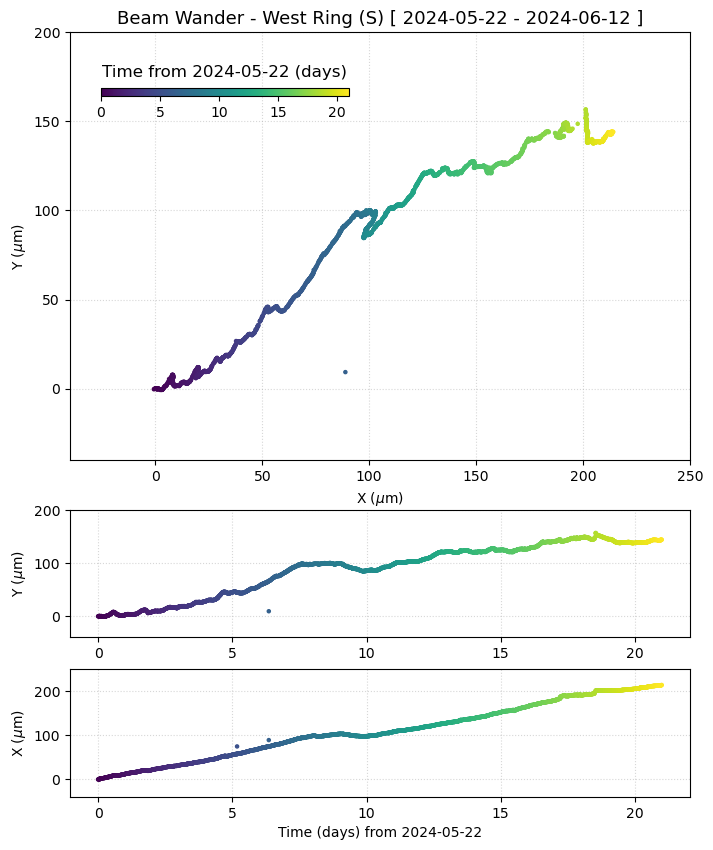

In [30]:
def __makeplot_beam_wander(df0):

    import matplotlib.pyplot as plt
    from matplotlib.gridspec import GridSpec

    time_scaling = 1/86400

    Ncol, Nrow = 2, 6

    font = 12

    fig = plt.figure(figsize=(8, 12))

    gs1 = GridSpec(Nrow, Ncol, figure=fig, hspace=0.7)
    gs2 = GridSpec(Nrow, Ncol, figure=fig)

    ax1 = fig.add_subplot(gs1[0:3, :])

    ax2 = fig.add_subplot(gs2[3, :])
    ax3 = fig.add_subplot(gs2[4, :])

    plt.subplots_adjust(hspace=0.25)

    # ax1.scatter(df0.x_idx, df0.y_idx, c=df0.time_sec*time_scaling, s=5, zorder=2)
    # cb = ax1.scatter(df0.x, df0.y, c=df0.time_sec*time_scaling, s=5, zorder=2)
    cb = ax1.scatter(df0.x_um_rel, df0.y_um_rel, c=df0.time_sec*time_scaling, s=5, zorder=2)

    # ax2.scatter(df0.time_sec*time_scaling, df0.y, c=df0.time_sec*time_scaling, s=5, zorder=2)
    # ax3.scatter(df0.time_sec*time_scaling, df0.x, c=df0.time_sec*time_scaling, s=5, zorder=2)
    ax2.scatter(df0.time_sec*time_scaling, df0.y_um_rel, c=df0.time_sec*time_scaling, s=5, zorder=2)
    ax3.scatter(df0.time_sec*time_scaling, df0.x_um_rel, c=df0.time_sec*time_scaling, s=5, zorder=2)

    ax1.set_ylabel("Y ($\mu$m)")
    ax1.set_xlabel("X ($\mu$m)")

    ax2.set_ylabel("Y ($\mu$m)")
    # ax2.set_xlabel(f"Time (days) from {str(df.time_utc.iloc[0])[:10]}")

    ax3.set_ylabel("X ($\mu$m)")
    ax3.set_xlabel(f"Time (days) from {str(df.time_utc.iloc[0])[:10]}")

    for ax in [ax1, ax2, ax3]:
        ax.grid(ls=":", alpha=0.5, zorder=0)

    # x1, x2 = 3.44, 3.52
    # y1, y2 = 1.62, 1.66
    x1, x2 = -40, 250
    y1, y2 = -40, 200
    ax1.set_xlim(x1, x2)
    ax1.set_ylim(y1, y2)
    ax2.set_ylim(y1, y2)
    ax3.set_ylim(x1, x2)

    # add title
    ax1.set_title(f"Beam Wander - West Ring (S) [ {df0.time_utc.iloc[0].date} - {df0.time_utc.iloc[-1].date} ]", fontsize=font+1)

    # add colorbar
    cax1 = ax1.inset_axes([0.05, 0.85, 0.4, 0.02])
    cb5 = plt.colorbar(cb, ax=ax1, cax=cax1, orientation="horizontal")
    cb5.set_label(f"Time from {df0.time_utc.iloc[0].date} (days)", fontsize=font, labelpad=-40)


    plt.show();
    return fig

fig = __makeplot_beam_wander(df)

fig.savefig(config['path_to_figures']+f"BeamWander_RV_IDS{config['camera']}_{config['date1']}_{config['date2']}.png", format="png", dpi=150, bbox_inches='tight')


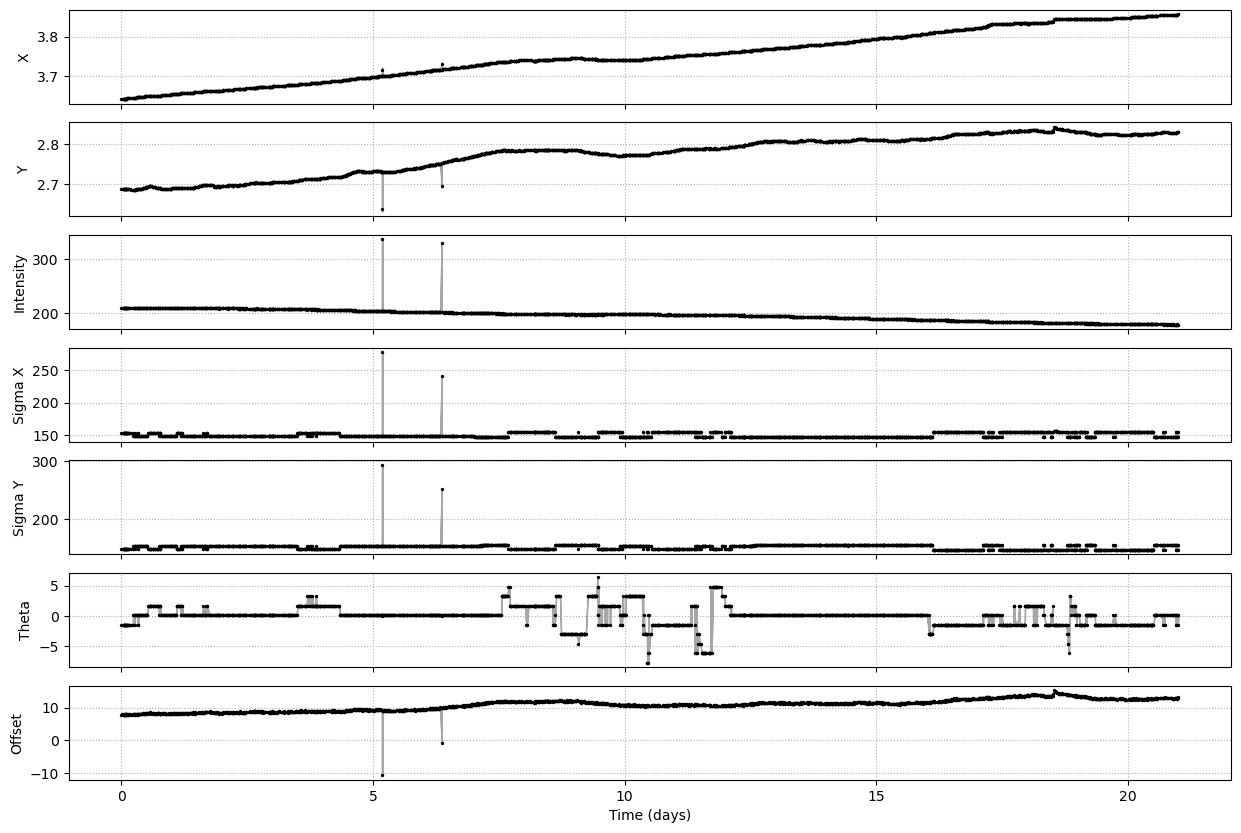

In [29]:
def __makeplot():

    Nrow, Ncol = 7, 1

    font = 12
    size = 2
    tscale = 1/86400

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 10), sharex=True)

    ax[0].fill_between(df.time_sec*tscale, df.x-df.x_var, df.x+df.x_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[0].scatter(df.time_sec*tscale, df.x, s=size, zorder=2, color="k")
    # ax[0].set_ylim(3.42, 3.75)
    ax[0].set_ylabel("X")

    ax[1].fill_between(df.time_sec*tscale, df.y-df.y_var, df.y+df.y_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[1].scatter(df.time_sec*tscale, df.y, s=size, zorder=2, color="k")
    # ax[1].set_ylim(1.58, 1.69)
    ax[1].set_ylabel("Y")

    ax[2].fill_between(df.time_sec*tscale, df.amp-df.amp_var, df.amp+df.amp_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[2].scatter(df.time_sec*tscale, df.amp, s=size, zorder=2, color="k")
    # ax[2].set_ylim(110, 130)
    ax[2].set_ylabel("Intensity")

    ax[3].fill_between(df.time_sec*tscale, df.x_sig-df.x_sig_var, df.x_sig+df.x_sig_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[3].scatter(df.time_sec*tscale, df.x_sig, s=size, zorder=2, color="k")
    # ax[3].set_ylim(511, 518)
    ax[3].set_ylabel("Sigma X")

    ax[4].fill_between(df.time_sec*tscale, df.y_sig-df.y_sig_var, df.y_sig+df.y_sig_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[4].scatter(df.time_sec*tscale, df.y_sig, s=size, zorder=2, color="k")
    # ax[4].set_ylim(480, 495)
    ax[4].set_ylabel("Sigma Y")

    ax[5].fill_between(df.time_sec*tscale, df.theta-df.theta_var, df.theta+df.theta_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[5].scatter(df.time_sec*tscale, df.theta, s=size, zorder=2, color="k")
    # ax[5].set_ylim(0.4, 0.55)
    ax[5].set_ylabel("Theta")

    ax[6].fill_between(df.time_sec*tscale, df.offset-df.offset_var, df.offset+df.offset_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[6].scatter(df.time_sec*tscale, df.offset, s=size, zorder=2, color="k")
    # ax[6].set_ylim(8.5, 11.5)
    ax[6].set_ylabel("Offset")

    ax[6].set_xlabel("Time (days)")

    for _n in range(Nrow):
        ax[_n].grid(ls=":", zorder=0)
        # ax[_n].legend(loc=1)

    plt.show();
    return fig

fig = __makeplot();

fig.savefig(config['path_to_figures']+f"BeamWander_RZ_IDS{config['camera']}_parameters_{config['date1']}_{config['date2']}.png", format="png", dpi=150, bbox_inches='tight')
